pip install tabulate

pip install plotly --upgrade

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import random
import tabulate
%matplotlib inline

In [2]:
Data=pd.read_csv('Iceland_House_Prediction.csv')

In [3]:
print(Data.columns)

Index(['ID of real estate', 'Date Of Purchase', 'Value Of Real estate',
       'Type Of Property', 'Id Of municipality', 'Year Of Construction',
       'Floor Number', 'Elevator available', 'Square Meters Of Property',
       'No. Of Floors', 'No. Of Parking spaces', 'No. of Bath Tubs',
       'No. of showers', 'No. of Toilets', 'No. of Kitchens', 'No. of rooms',
       'No. of living rooms', 'No. of storage spaces',
       'Measurement of completeness', 'Location Of Property',
       'Sub-location property', 'Type of property'],
      dtype='object')


In [4]:
Data.rename(columns={'ID of real estate':'ID', 'Date Of Purchase':'DateSale', 'Value Of Real estate':'Price',
       'Type Of Property':'Type', 'Id Of municipality':'Neighborhood', 'Year Of Construction':'YearBuilt',
       'Floor Number':'FloorN', 'Elevator available':'ElevatorE', 'Square Meters Of Property':'M2',
       'No. Of Floors':'NFloor', 'No. Of Parking spaces':'NParking', 'No. of Bath Tubs':'NBathTup',
       'No. of showers':'NShowers', 'No. of Toilets':'NToilets', 'No. of Kitchens':'NKitchens', 'No. of rooms':'NRooms',
       'No. of living rooms':'NLivingroom', 'No. of storage spaces':'NStorages',
       'Measurement of completeness':'Completeness', 'Location Of Property':'Location',
       'Sub-location property':'Sublocation', 'Type of property':'TypeofProperty'},  inplace=True)

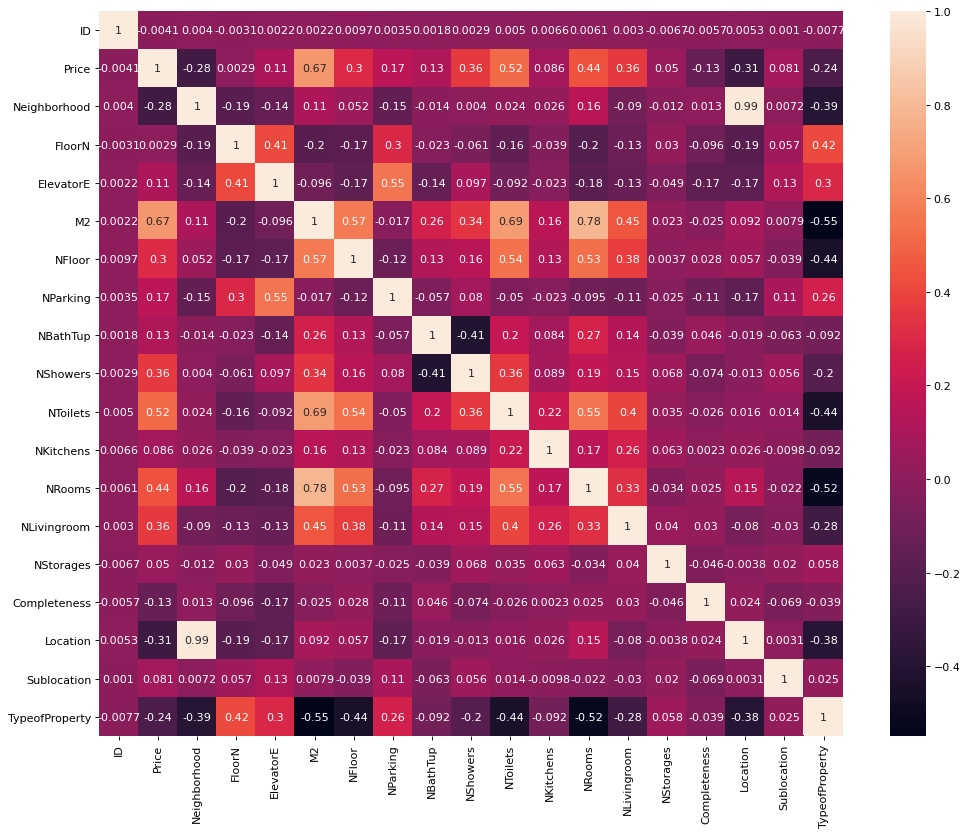

In [5]:
plt.figure(figsize=(15, 12), dpi=80)
corrMatrix = Data.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [6]:

L=['FloorN','ElevatorE','M2','NFloor','NParking','NBathTup','NShowers','NToilets','NKitchens','NRooms','NLivingroom','NStorages','Completeness']



In [7]:
Z_Mat=[5*[0] for i in range(0,13)]
for i in range(len(L)):
    Z_Mat[i][0]=np.mean(Data[L[i]])
    Z_Mat[i][1]=np.std(Data[L[i]])
    Z_Mat[i][2]=np.min(Data[L[i]])
    Z_Mat[i][3]=np.median(Data[L[i]])
    Z_Mat[i][4]=np.max(Data[L[i]])
    
    
table=pd.DataFrame(Z_Mat,columns=['mean','std', 'min', 'median', 'max' ],index=L )

    

In [8]:
table

,mean,std,min,median,max
FloorN,1.873311,1.437282,-1.0,1.0,16.0
ElevatorE,0.321239,0.808781,0.0,0.0,8.0
M2,107.074470,44.371822,17.7,98.6,618.4
NFloor,1.213280,0.469279,1.0,1.0,4.0
NParking,0.150724,0.397213,0.0,0.0,25.0
NBathTup,0.786347,0.435665,0.0,1.0,6.0
NShowers,0.528295,0.565420,0.0,0.0,4.0
NToilets,1.196042,0.459551,0.0,1.0,5.0
NKitchens,1.006109,0.159025,0.0,1.0,4.0
NRooms,2.618414,1.352483,0.0,2.0,32.0


In [9]:
plot_dims = (14, 9)
L=list(set(L)-{'M2'})

[Text(0.5, 0, 'Coloums'), Text(0, 0.5, 'Numbers')]

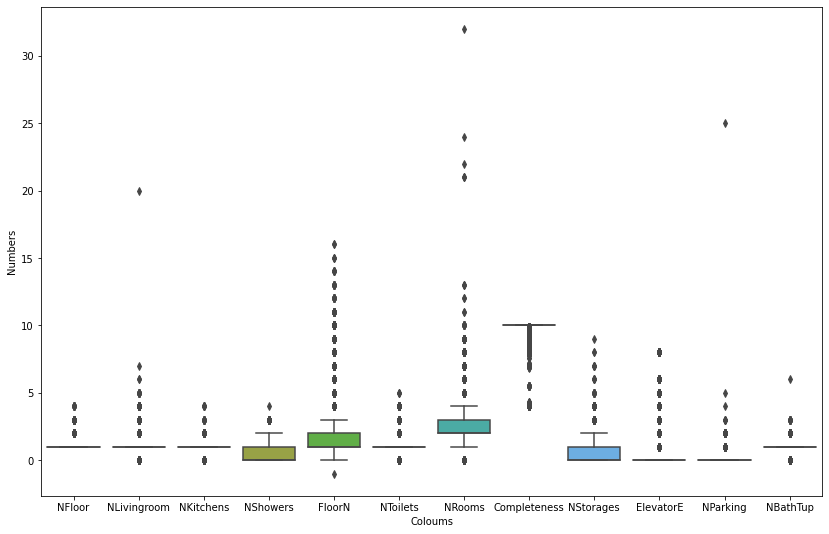

In [10]:
fig, ax = plt.subplots(figsize=plot_dims)
sn.boxplot( data=Data[L])
ax.set(xlabel='Coloums', ylabel='Numbers')

We can see that some the data houses have more than 30 rooms so we will the propertise with more than 7 rooms. 

In [11]:
Data=Data[(Data.NRooms<8)& ( Data.NLivingroom <4)& (Data.NParking<4) ]
s = pd.Series([i for i in range(34579)])
Data.set_index([s])

,ID,DateSale,Price,Type,Neighborhood,YearBuilt,FloorN,ElevatorE,M2,NFloor,...,NShowers,NToilets,NKitchens,NRooms,NLivingroom,NStorages,Completeness,Location,Sublocation,TypeofProperty
0,10580956,02/11/2011,18636,Residential House,0,01/01/1970,2,0,117.0,1,...,0,1,1,3,1,2,10.0,200,0,12
1,10779688,31/10/2011,17533,Residential House,0,01/01/1953,0,0,67.9,1,...,1,1,1,1,1,1,10.0,70,0,12
2,10712711,07/10/2011,14472,Residential House,0,01/01/1921,0,0,45.7,1,...,1,1,1,1,1,0,10.0,20,0,12
3,10774018,28/10/2011,14850,Residential House,0,01/01/1967,1,0,78.1,1,...,0,1,1,2,1,1,10.0,200,0,12
4,10891899,03/11/2011,20831,Residential House,0,01/01/1952,0,0,87.4,1,...,0,1,1,2,1,2,10.0,70,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34574,10719030,01/11/2011,25133,Town House,0,01/01/1981,1,0,128.2,2,...,0,2,1,4,2,0,10.0,160,0,11
34575,10077682,02/11/2011,14700,Residential House,0,01/01/1970,1,0,38.7,1,...,1,1,1,1,1,1,10.0,280,0,12
34576,10298834,26/10/2011,44896,Villa,0,01/01/1981,1,0,222.4,3,...,1,2,1,6,2,0,10.0,150,0,11
34577,10306230,02/11/2011,11698,Residential House,0,01/01/1975,2,0,48.4,1,...,0,1,1,1,1,0,10.0,160,0,12


[Text(0.5, 0, 'Coloums'), Text(0, 0.5, 'Numbers')]

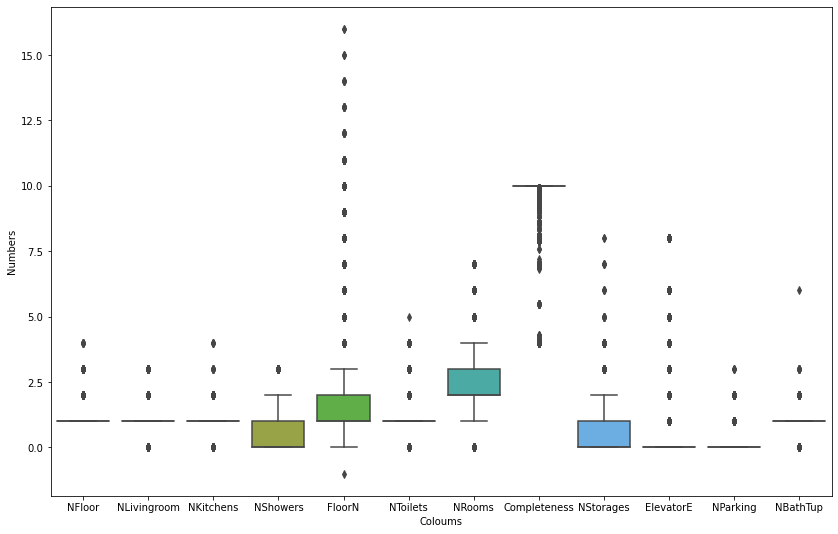

In [12]:
L=list(set(L)-{'M2'})
fig, ax = plt.subplots(figsize=plot_dims)
sn.boxplot( data=Data[L])
ax.set(xlabel='Coloums', ylabel='Numbers')

In [13]:
X=Data.drop(['Price','DateSale', 'Type', 'YearBuilt','ID'], axis=1).values
y=Data['Price'].values

In [14]:
X

array([[0.0e+00, 2.0e+00, 0.0e+00, ..., 2.0e+02, 0.0e+00, 1.2e+01],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 7.0e+01, 0.0e+00, 1.2e+01],
       [0.0e+00, 0.0e+00, 0.0e+00, ..., 2.0e+01, 0.0e+00, 1.2e+01],
       ...,
       [0.0e+00, 1.0e+00, 0.0e+00, ..., 1.5e+02, 0.0e+00, 1.1e+01],
       [0.0e+00, 2.0e+00, 0.0e+00, ..., 1.6e+02, 0.0e+00, 1.2e+01],
       [1.4e+03, 3.0e+00, 2.0e+00, ..., 6.3e+02, 0.0e+00, 1.2e+01]])

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=25)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:

reg = LinearRegression().fit(X_train, y_train)

In [18]:
y_pred=reg.predict(X_test)

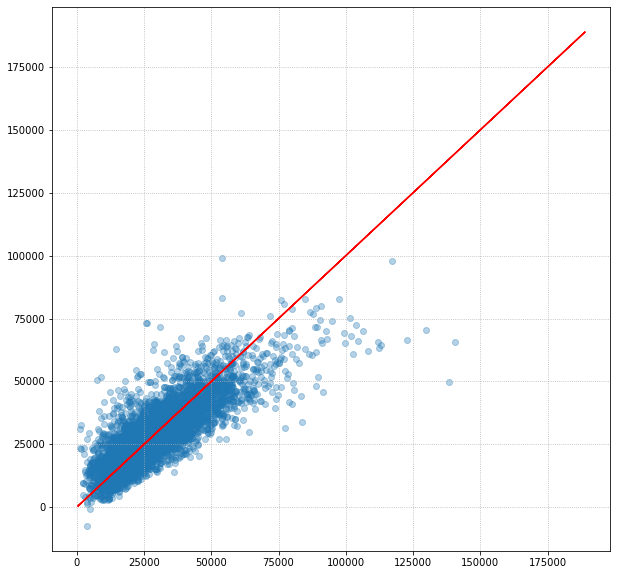

In [19]:
fig = plt.figure(figsize =(10, 10))
plt.scatter(y_test,y_pred , alpha=1/3)
plt.plot(y_train,y_train,color="red")

plt.grid(.5,ls=":")
plt.show()

In [20]:
RMSE=np.sqrt(np.mean(np.square(y_test-y_pred)))

In [21]:
RMSE

8103.397614676781

In [22]:
y_trainPred=reg.predict(X_train)

In [23]:
RMSEofTrain=np.sqrt(np.mean(np.square(y_train-y_trainPred)))

In [24]:
RMSEofTrain

8458.768363933874